In [0]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [0]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!kaggle datasets download -d sovitrath/diabetic-retinopathy-224x224-gaussian-filtered

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)  729MB  2020-03-27 23:46:53          38469  
ryanxjhan/cbc-news-coronavirus-articles-march-26               CBC News Coronavirus/COVID-19 Articles (NLP)          6MB  2020-03-27 23:23:07             56  
sobhanmoosavi/us-accidents                                     US Accidents (3.0 million records)                  199MB  2020-01-17 04:45:09          11836  
fireballbyedimyrnmom/us-counties-covid-19-dataset              US counties COVID 19 dataset                        150KB  2020-03-31 12:41:45            115  
monogenea/birdsongs-from-europe               

In [0]:
!kaggle datasets download -d sovitrath/diabetic-retinopathy-224x224-gaussian-filtered

ERROR! Session/line number was not unique in database. History logging moved to new session 60
 98% 420M/427M [00:04<00:00, 69.4MB/s]
100% 427M/427M [00:04<00:00, 90.3MB/s]


In [0]:
!mv diabetic-retinopathy-224x224-gaussian-filtered.zip ./Datasets/

In [0]:
!unzip Datasets/diabetic-retinopathy-224x224-gaussian-filtered.zip

Archive:  Datasets/diabetic-retinopathy-224x224-gaussian-filtered.zip
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0024cdab0c1e.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/00cb6555d108.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0124dffecf29.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/01b3aed3ed4c.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0369f3efe69b.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/03e25101e8e8.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/04ac765f91a1.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/059bc89df7f4.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/05a5183c92d0.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0684311afdfc.png  
  inflating: gaussian_filtered_images/gaussian_filtered_imag

In [0]:
!mv gaussian_filtered_images/ ./Datasets/

In [0]:
# Initialize the notebook
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

%matplotlib inline
np.random.seed(17)

In [0]:
# Load images and create label vector
root_path = "/content/drive/My Drive/Colab Notebooks/Datasets/"
images_path = root_path + "gaussian_filtered_images/gaussian_filtered_images/"
images = [] # images
Y = [] # label vector

dir_names = [dir_name for dir_name in os.listdir(images_path) if os.path.isdir(images_path + dir_name)]
for dir_name in dir_names:
    if dir_name == "No_DR": # Create a label
        y = 0 
    else:
        y = 1
    for file_name in os.listdir(images_path + dir_name):
        images.append(plt.imread(images_path + dir_name + "/" + file_name))
        Y.append(y)
    print("Finish reading " + dir_name + " condition images.")
    print("Total image read: " + str(len(images)))
print("End of the data")
Y = np.reshape(np.array(Y), (1, -1)) # Make Y to be a row vector

Finish reading Mild condition images.
Total image read: 370
Finish reading Moderate condition images.
Total image read: 1369
Finish reading No_DR condition images.
Total image read: 3174
Finish reading Proliferate_DR condition images.
Total image read: 3469
Finish reading Severe condition images.
Total image read: 3662
End of the data


Size of each image: (224, 224, 3)
Size of labels: (1, 3662)
Number of DR (y = 1): 1857
Number of No_DR (y = 0): 1805


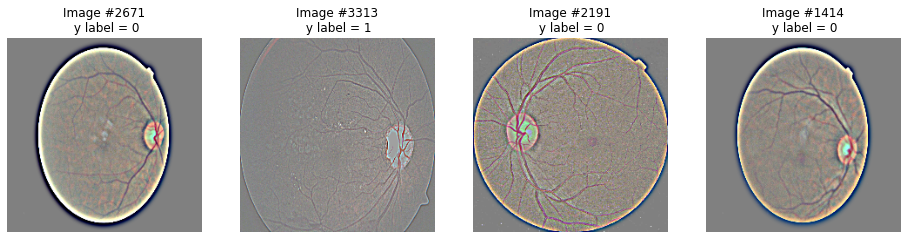

In [0]:
# Print some detail
print("Size of each image: " + str(images[0].shape))
print("Size of labels: " + str(Y.shape))
print("Number of DR (y = 1): " + str(np.sum(Y)))
print("Number of No_DR (y = 0): " + str(Y.shape[1] - np.sum(Y)))

# Randomly show images
n = 4 # show 4 images
fig, axes = plt.subplots(nrows = 1, ncols = n, figsize=(16, 16))
rand_idx = np.random.randint(0, len(images), n)
for i in range(n):
    axes[i].imshow(images[rand_idx[i]])
    axes[i].title.set_text("Image #" + str(rand_idx[i]) + "\n y label = " + str(Y[0][rand_idx[i]]))
    axes[i].axis("off")
fig.show()

Size of each grayscale image: (224, 224)


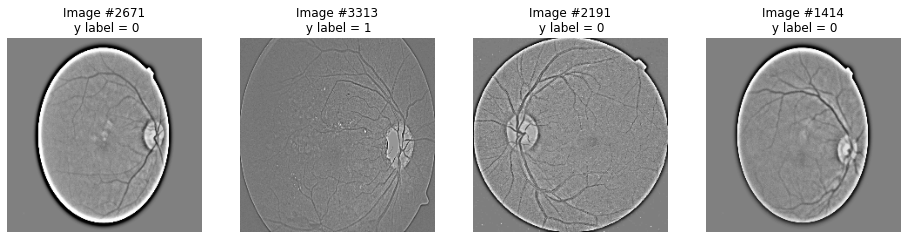

In [0]:
def rgb_to_gray(image):
    rgb_weights = [0.2989, 0.5870, 0.1140]
    return np.dot(image, rgb_weights)

gray_images = list(map(rgb_to_gray, images)) # Convert RGB images to grayscale images

# Print the image size
print("Size of each grayscale image: " + str(gray_images[0].shape))

# Show grayscale images
fig, axes = plt.subplots(nrows = 1, ncols = n, figsize=(16, 16))
for i in range(n):
    axes[i].imshow(gray_images[rand_idx[i]], cmap='gray')
    axes[i].title.set_text("Image #" + str(rand_idx[i]) + "\n y label = " + str(Y[0][rand_idx[i]]))
    axes[i].axis("off")
fig.show()

In [0]:
X = np.array(gray_images).reshape(len(gray_images), -1).T # flatten and reshape
print("Size of data set (n_x, m): " + str(X.shape))
print("Size of label (1, m): " + str(Y.shape))

Size of data set (n_x, m): (50176, 3662)
Size of label (1, m): (1, 3662)


In [0]:
# Split the data to train/test set
X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y.T, test_size = 0.25, random_state = 5)

In [0]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2746, 50176), (916, 50176), (2746, 1), (916, 1))

In [0]:
from sklearn import svm

In [0]:
clf = svm.SVC(decision_function_shape='ovo')

In [0]:
clf.fit(X_train, Y_train.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
y_pred = clf.predict(X_test)
score = clf.score(X_test, Y_test)
print("Score: ", score)
print("Precision: ",precision_score(Y_test, y_pred))
print("recall: ",recall_score(Y_test, y_pred))
print("F1: ",f1_score(Y_test, y_pred))

Score:  0.9410480349344978
Precision:  0.9365750528541226
recall:  0.9486081370449678
F1:  0.9425531914893617


In [0]:
import pickle
pickle.dump(clf, open('/content/drive/My Drive/Colab Notebooks/model.pkl', 'wb'))